# Metadata

```yaml
Course:    DS 5001
Module:    10 Lab
Topic:     Sentiment Analysis of Novels 
Author:    R.C. Alvarado
Date:      02 April 2023 (revised)
```

**Purpose:** Use the NRC lexicon to explore sentiment in two novels.

# Set Up

## Config

In [1]:
data_in = '../data'
data_out = '../data'
data_prefix = 'austen-melville'

In [2]:
novels_csv = '{}/output/{}-TOKEN2.csv'.format(data_in, data_prefix)
vocab_csv = '{}/output/{}-VOCAB2.csv'.format(data_in, data_prefix)
lib_csv = '{}/output/{}-LIB_FIXED.csv'.format(data_in, data_prefix)
bow_csv = '{}/output/{}-BOW.csv'.format(data_in, data_prefix)

In [3]:
# For TOKENS
OHCO = ['book_id', 'chap_num', 'para_num', 'sent_num', 'token_num']
BOOKS = OHCO[:1]
CHAPS = OHCO[:2]
PARAS = OHCO[:3]
SENTS = OHCO[:4]

In [4]:
salex_csv = f'{data_in}/lexicons/salex_nrc.csv'
emo_cols = "anger anticipation disgust fear joy sadness surprise trust polarity".split()

## Import

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly_express as px
from IPython.display import display, HTML

In [6]:
sns.set()

# Get Data

In [7]:
TOKENS = pd.read_csv(novels_csv).set_index(OHCO).sort_index()
VOCAB = pd.read_csv(vocab_csv).set_index('term_str').sort_index()
LIB = pd.read_csv(lib_csv).set_index('book_id')[['author','title']].sort_index()
BOW = pd.read_csv(bow_csv).set_index(['book_id','chap_num','term_str']).sort_index()

In [8]:
BOW

n        tf     tfidf
book_id chap_num term_str                       
105     1        1         2  0.000762  0.005084
                 15        1  0.000381  0.003479
                 16        1  0.000381  0.003860
                 1760      1  0.000381  0.003860
                 1784      1  0.000381  0.003860
...                       ..       ...       ...
53861   15       yet       2  0.000796  0.000366
                 you       1  0.000398  0.000141
                 young     3  0.001194  0.001295
                 your      1  0.000398  0.000270
                 zebra     1  0.000398  0.003236

[731536 rows x 3 columns]

In [9]:
LIB['author_id'] = LIB.author.str.split(', ').str[0]

In [10]:
LIB['title_short'] = LIB.author_id + ' ' + LIB.index.astype('str') + ': ' + LIB.title.str[:25] 

In [11]:
LIB

,author,title,author_id,title_short
book_id,,,,
105,"AUSTEN, JANE",PERSUASION,AUSTEN,AUSTEN 105: PERSUASION
121,"AUSTEN, JANE",NORTHANGER ABBEY,AUSTEN,AUSTEN 121: NORTHANGER ABBEY
141,"AUSTEN, JANE",MANSFIELD PARK,AUSTEN,AUSTEN 141: MANSFIELD PARK
158,"AUSTEN, JANE",EMMA,AUSTEN,AUSTEN 158: EMMA
161,"AUSTEN, JANE",SENSE AND SENSIBILITY,AUSTEN,AUSTEN 161: SENSE AND SENSIBILITY
946,"AUSTEN, JANE",LADY SUSAN,AUSTEN,AUSTEN 946: LADY SUSAN
1212,"AUSTEN, JANE",LOVE AND FREINDSHIP SIC,AUSTEN,AUSTEN 1212: LOVE AND FREINDSHIP SIC
1342,"AUSTEN, JANE",PRIDE AND PREJUDICE,AUSTEN,AUSTEN 1342: PRIDE AND PREJUDICE
1900,"MELVILLE, HERMAN",TYPEE A ROMANCE OF THE SOUTH SEAS,MELVILLE,MELVILLE 1900: TYPEE A ROMANCE OF THE SO


In [12]:
persuasion = 105
mobydick = 2701

# Get SA Lexicon

In [13]:
SALEX = pd.read_csv(salex_csv).set_index('term_str')
SALEX.columns = [col.replace('nrc_','') for col in SALEX.columns]
SALEX['polarity'] = SALEX.positive - SALEX.negative

In [14]:
SALEX

,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust,polarity
term_str,,,,,,,,,,,
abandon,0,0,0,1,0,1,0,1,0,0,-1
abandoned,1,0,0,1,0,1,0,1,0,0,-1
abandonment,1,0,0,1,0,1,0,1,1,0,-1
abduction,0,0,0,1,0,1,0,1,1,0,-1
aberration,0,0,1,0,0,1,0,0,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...
young,0,1,0,0,1,0,1,0,1,0,1
youth,1,1,0,1,1,0,1,0,1,0,1
zeal,0,1,0,0,1,0,1,0,1,1,1


# Compute Sentiment

# Combine SALEX with VOCAB

In [15]:
V = pd.concat([VOCAB.reset_index().set_index('term_str'), SALEX], join='inner', axis=1) #\
    # .reset_index().set_index('term_id')

In [16]:
V.head()

,term_rank,n,n_chars,p,i,max_pos,n_pos,cat_pos,stop,stem_porter,...,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust,polarity
term_str,,,,,,,,,,,,,,,,,,,,,
abandon,6946,20,7,0.000010,16.651555,VB,4,"{'VB', 'VBP', 'NNS', 'JJ'}",0,abandon,...,0,0,1,0,1,0,1,0,0,-1
abandoned,2555,72,9,0.000035,14.803558,VB,6,"{'NN', 'IN', 'VBD', 'VBN', 'JJ', 'RB'}",0,abandon,...,0,0,1,0,1,0,1,0,0,-1
abandonment,8727,15,11,0.000007,17.066592,NN,2,"{'NN', 'JJ'}",0,abandon,...,0,0,1,0,1,0,1,1,0,-1
aberration,19827,3,10,0.000001,19.388520,NN,1,{'NN'},0,aberr,...,0,1,0,0,1,0,0,0,0,-1
abhor,10499,11,5,0.000005,17.514051,VB,3,"{'VB', 'VBP', 'NN'}",0,abhor,...,0,1,1,0,1,0,0,0,0,-1


# Merge VOCAB with BOW

In [17]:
B = BOW.join(V[['max_pos'] + emo_cols], on='term_str', rsuffix='_v').dropna()

In [18]:
B

n        tf     tfidf max_pos  anger  \
book_id chap_num term_str                                           
105     1        admiration  1  0.000381  0.001148      NN    0.0   
                 admire      1  0.000381  0.001502      VB    0.0   
                 advise      1  0.000381  0.001846      VB    0.0   
                 agreeable   2  0.000762  0.001987      JJ    0.0   
                 alarm       1  0.000381  0.001252      NN    0.0   
...                         ..       ...       ...     ...    ...   
53861   15       wild        3  0.001194  0.002479      JJ    0.0   
                 word        4  0.001592  0.002312      NN    0.0   
                 words       1  0.000398  0.000699      NN    1.0   
                 wretched    1  0.000398  0.001516      JJ    0.0   
                 young       3  0.001194  0.001295      JJ    0.0   

                             anticipation  disgust  fear  joy  sadness  \
book_id chap_num term_str                                                
105     1        admiration           0.0      0.0   0.0  1.0      0.0   
                 admire               0.0      0.0   0.0  0.0      0.0   
                 advise               0.0      0.0   0.0  0.0      0.0   
                 agreeable            0.0      0.0   0.0  0.0      0.0   
                 alarm                0.0      0.0   1.0  0.0      0.0   
...                                   ...      ...   ...  ...      ...   
53861   15       wild                 0.0      0.0   0.0  0.0      0.0   
                 word                 0.0      0.0   0.0  0.0      0.0   
                 words                0.0      0.0   0.0  0.0      0.0   
                 wretched             0.0      1.0   0.0  0.0      1.0   
                 young                1.0      0.0   0.0  1.0      0.0   

                             surprise  trust  polarity  
book_id chap_num term_str                               
105     1        admiration       0.0    1.0       1.0  
                 admire           0.0    1.0       1.0  
                 advise           0.0    1.0       1.0  
                 agreeable        0.0    1.0       1.0  
                 alarm            1.0    0.0      -1.0  
...                               ...    ...       ...  
53861   15       wild             1.0    0.0      -1.0  
                 word             0.0    1.0       1.0  
                 words            0.0    0.0      -1.0  
                 wretched         0.0    0.0      -1.0  
                 young            1.0    0.0       1.0  

[89455 rows x 13 columns]

# Weight Emotions by TFIDF

In [19]:
for col in emo_cols:
    B[col] = B[col] * B.tfidf

In [20]:
B.head()

n        tf     tfidf max_pos  anger  \
book_id chap_num term_str                                           
105     1        admiration  1  0.000381  0.001148      NN    0.0   
                 admire      1  0.000381  0.001502      VB    0.0   
                 advise      1  0.000381  0.001846      VB    0.0   
                 agreeable   2  0.000762  0.001987      JJ    0.0   
                 alarm       1  0.000381  0.001252      NN    0.0   

                             anticipation  disgust      fear       joy  \
book_id chap_num term_str                                                
105     1        admiration           0.0      0.0  0.000000  0.001148   
                 admire               0.0      0.0  0.000000  0.000000   
                 advise               0.0      0.0  0.000000  0.000000   
                 agreeable            0.0      0.0  0.000000  0.000000   
                 alarm                0.0      0.0  0.001252  0.000000   

                             sadness  surprise     trust  polarity  
book_id chap_num term_str                                           
105     1        admiration      0.0  0.000000  0.001148  0.001148  
                 admire          0.0  0.000000  0.001502  0.001502  
                 advise          0.0  0.000000  0.001846  0.001846  
                 agreeable       0.0  0.000000  0.001987  0.001987  
                 alarm           0.0  0.001252  0.000000 -0.001252

# Explore Emotion Words and POS

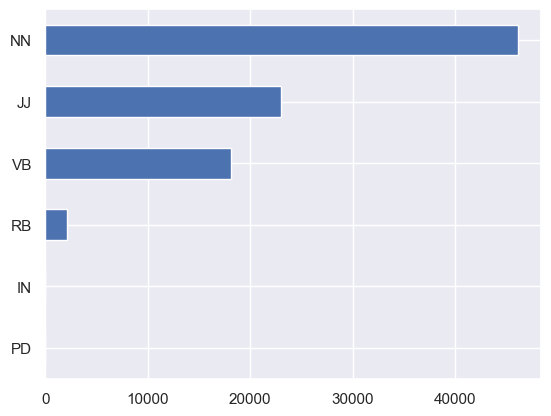

In [21]:
B.max_pos.value_counts().sort_values().plot.barh();

In [22]:
EMO_BOOKS = B.groupby(['book_id'])[emo_cols].mean()
EMO_CHAPS = B.groupby(['book_id','chap_num'])[emo_cols].mean()

In [23]:
EMO_BOOKS.index = LIB.title_short #book_title

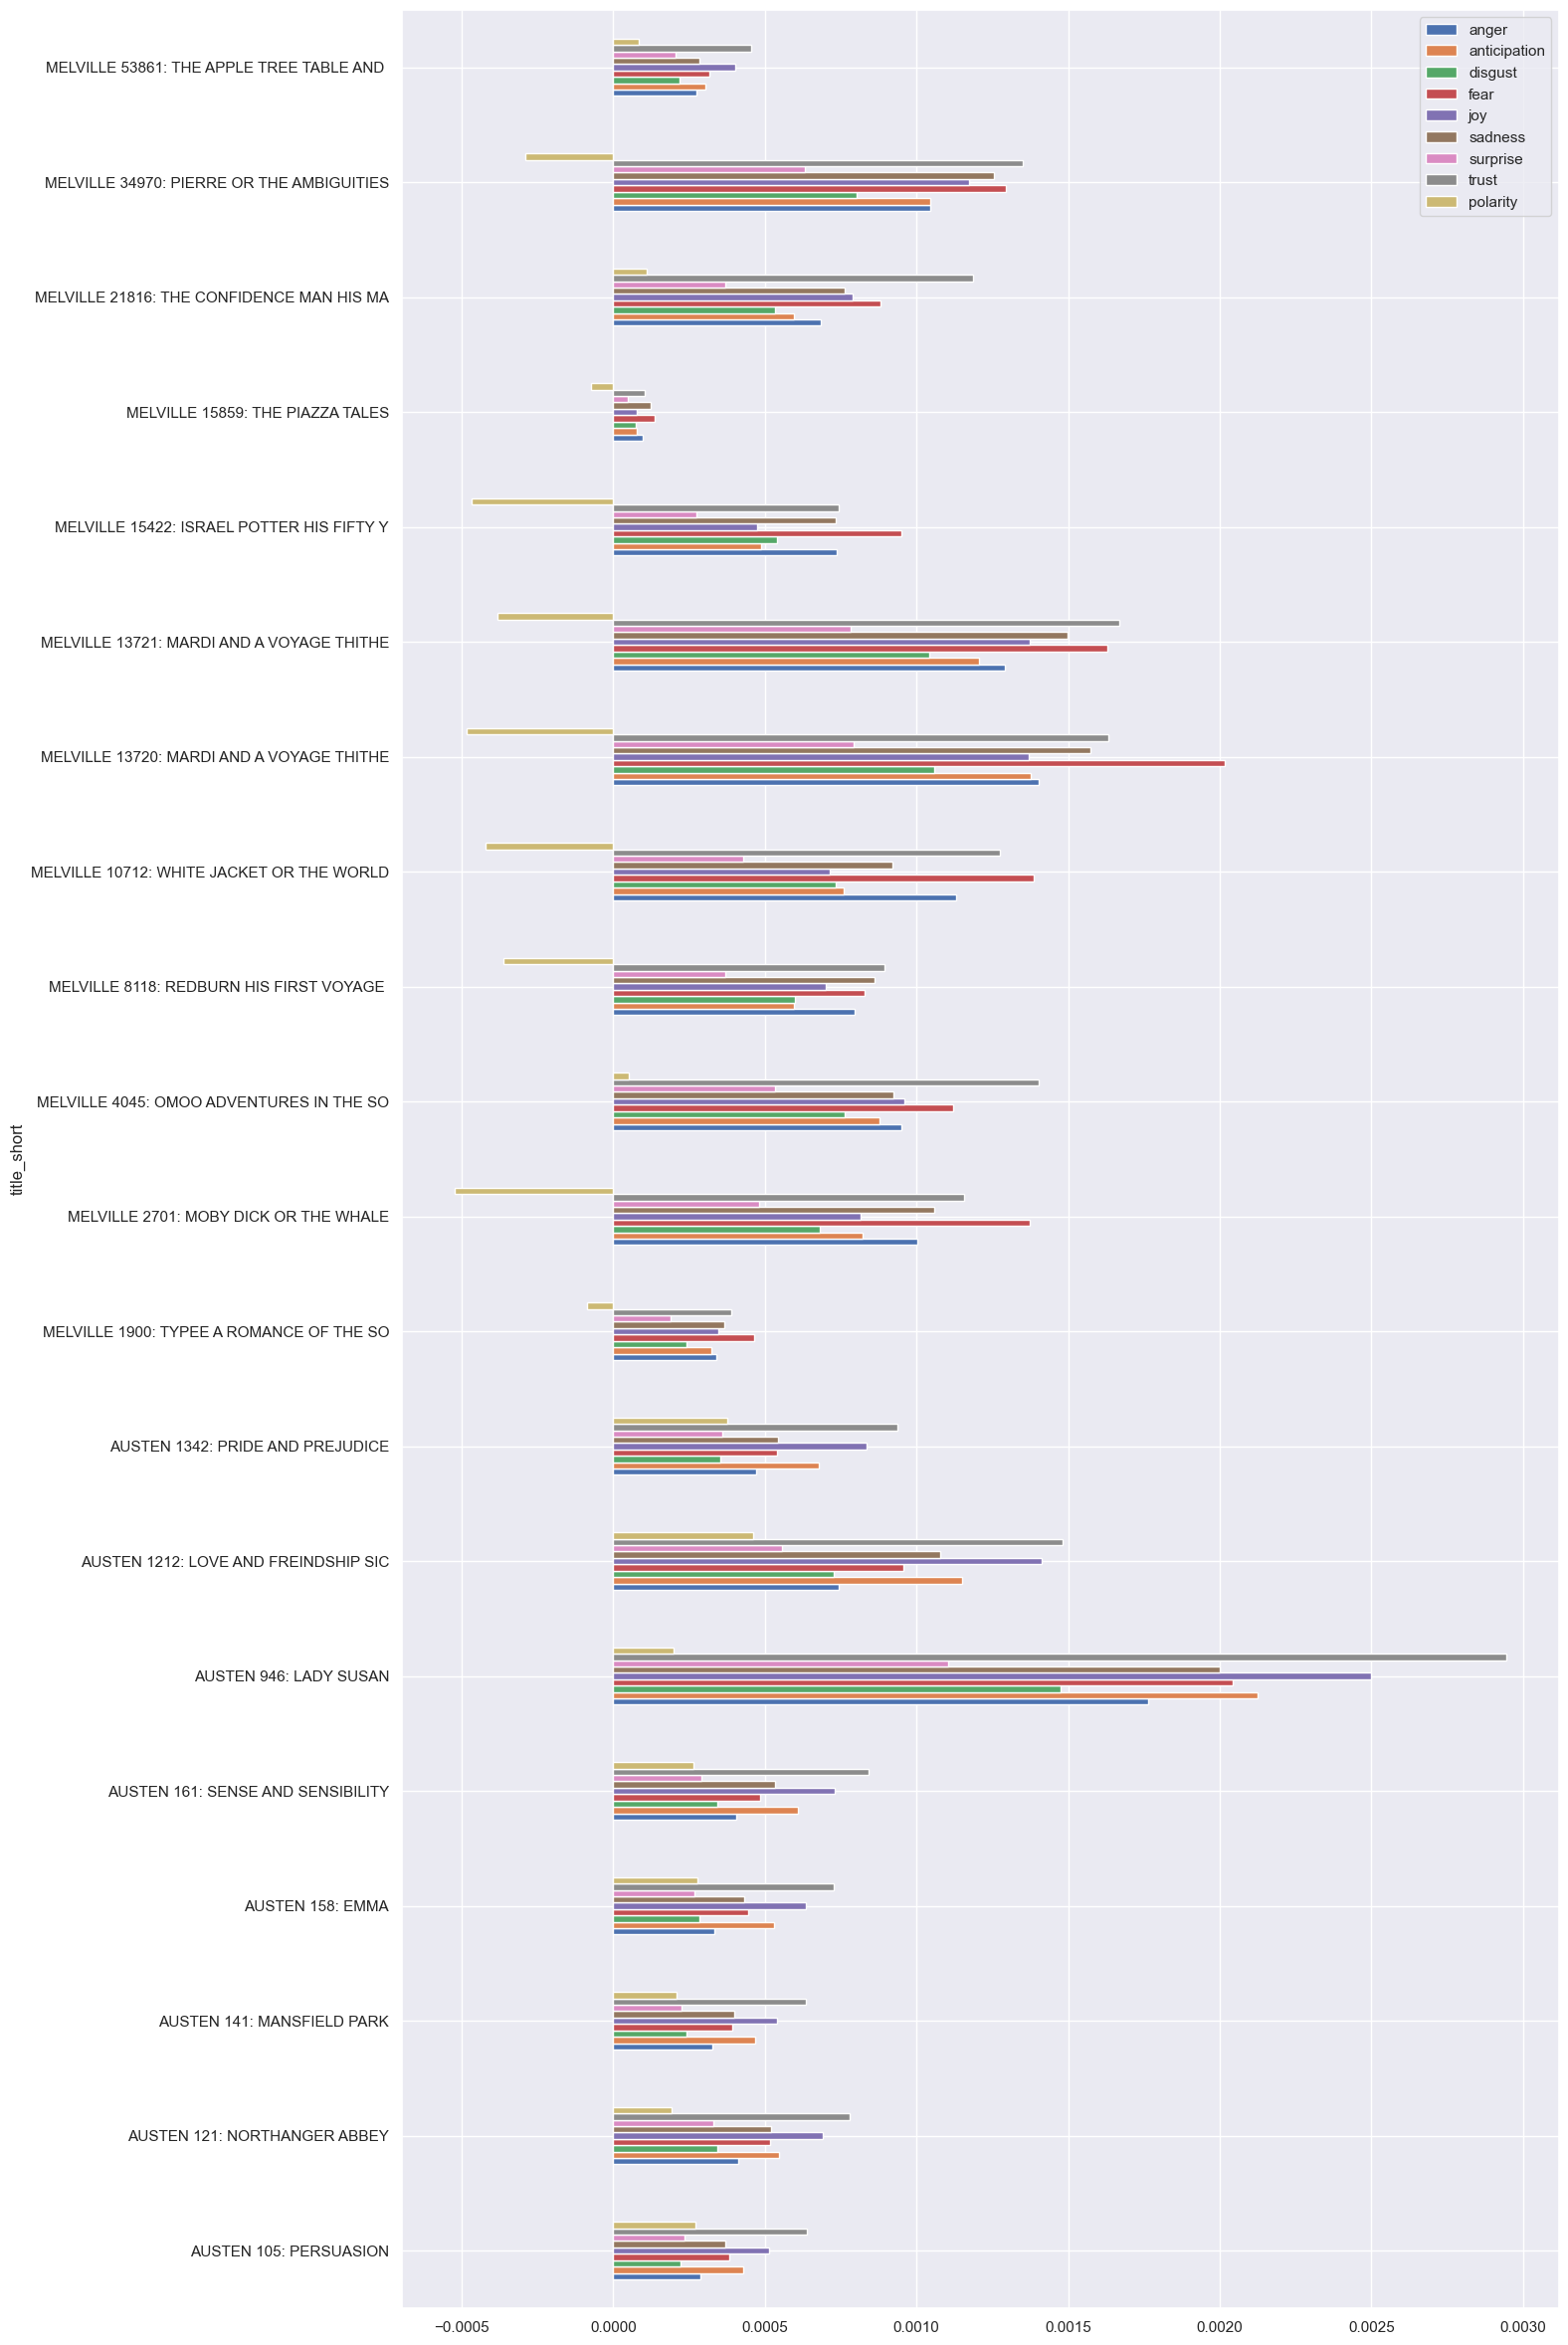

In [24]:
EMO_BOOKS.plot.barh(figsize=(15,30));

# Compare Texts

In [25]:
PERSUASION = EMO_CHAPS.loc[persuasion].copy()
MOBYDICK = EMO_CHAPS.loc[mobydick].copy()

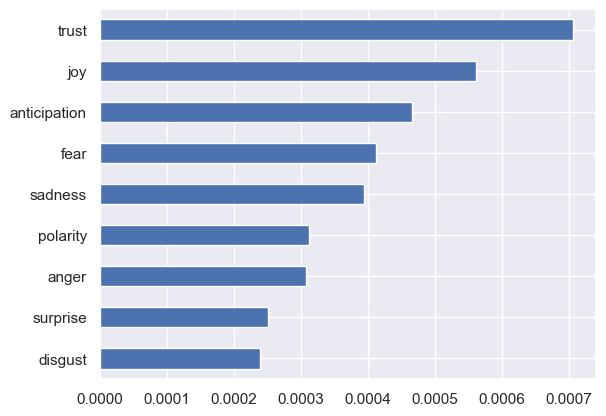

In [26]:
PERSUASION.mean().sort_values().plot.barh();

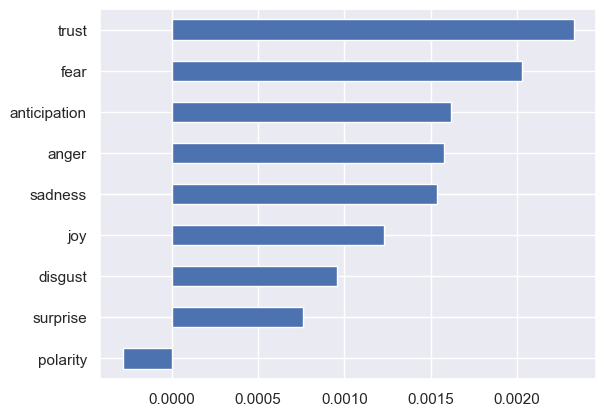

In [27]:
MOBYDICK.mean().sort_values().plot.barh();

# What is Trust?

In [28]:
trust_words = pd.Series(SALEX[SALEX['trust'] == 1].index.tolist())

In [29]:
trust_words.sample(10)

590          nun
134    checklist
559      medical
384      gazette
312     ensemble
543     majority
671       primer
168    companion
3       accolade
582    negotiate
dtype: object

# Mean Sentiment by Chapter

In [30]:
PERSUASION_chaps = EMO_CHAPS.loc[persuasion] 
MOBYDICK_chaps = EMO_CHAPS.loc[mobydick] 

In [31]:
PERSUASION_chaps.style.background_gradient(cmap='YlGnBu', axis=None)

,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,polarity
chap_num,,,,,,,,,
1,0.000341,0.000535,0.000299,0.000474,0.000670,0.000552,0.000308,0.000959,0.000434
2,0.000483,0.000576,0.000385,0.000567,0.000590,0.000474,0.000275,0.001323,0.000648
3,0.000370,0.000504,0.000231,0.000370,0.000525,0.000347,0.000242,0.001661,0.001255
4,0.000760,0.000801,0.000524,0.001032,0.000969,0.000675,0.000535,0.000943,0.000153
5,0.000356,0.000415,0.000317,0.000409,0.000467,0.000420,0.000198,0.000526,0.000071
6,0.000227,0.000344,0.000217,0.000286,0.000428,0.000359,0.000210,0.000549,0.000222
7,0.000450,0.000575,0.000262,0.000535,0.000549,0.000460,0.000268,0.000372,-0.000140
8,0.000227,0.000331,0.000159,0.000314,0.000504,0.000359,0.000258,0.000566,0.000269
9,0.000278,0.000459,0.000207,0.000375,0.000509,0.000380,0.000232,0.000669,0.000228


In [32]:
MOBYDICK_chaps.style.background_gradient(cmap='YlGnBu', axis=None)

,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,polarity
chap_num,,,,,,,,,
1,0.004329,0.001051,0.004806,0.004329,0.003517,0.010490,0.002687,0.022839,0.012349
2,0.004988,0.005183,0.003460,0.006403,0.004148,0.004501,0.002735,0.005580,-0.003983
3,0.000563,0.000392,0.000392,0.000645,0.000345,0.000457,0.000167,0.000555,-0.000267
4,0.000516,0.000593,0.000336,0.000618,0.000554,0.000619,0.000363,0.000984,-0.000031
5,0.000616,0.000644,0.000645,0.001345,0.000504,0.001724,0.000273,0.000599,-0.001514
6,0.000272,0.000224,0.000260,0.000425,0.000223,0.000286,0.000130,0.000234,-0.000302
7,0.000707,0.000742,0.000785,0.001004,0.000782,0.000739,0.000529,0.001010,-0.000354
8,0.001316,0.001622,0.001116,0.002446,0.002013,0.000782,0.000891,0.001798,0.000308
9,0.000839,0.001934,0.000931,0.001134,0.002674,0.001138,0.001090,0.002465,0.000890


# Create Stacked Dataframes (for Plotly Express)

In [33]:
PERSUASION_chaps_thin = EMO_CHAPS.stack().to_frame().reset_index().rename(columns={0:'value','level_2':'emo'}).query("book_id == {}".format(persuasion))
MOBYDICK_chaps_thin= EMO_CHAPS.stack().to_frame().reset_index().rename(columns={0:'value','level_2':'emo'}).query("book_id == {}".format(mobydick))

In [34]:
def plot_sentiments(df, emo='polarity'):
    FIG = dict(figsize=(25, 5), legend=True, fontsize=14, rot=45)
    df[emo].plot(**FIG)

In [70]:
# plot_sentiments(PERSUASION_chaps, emo_cols)

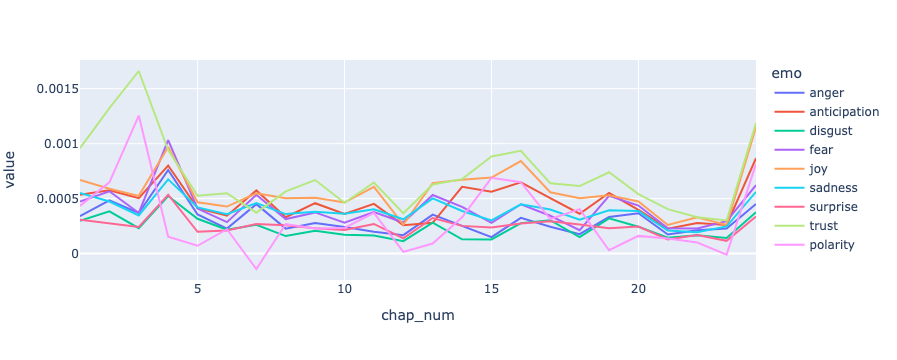

In [71]:
px.line(PERSUASION_chaps_thin, x='chap_num', y='value', color='emo')

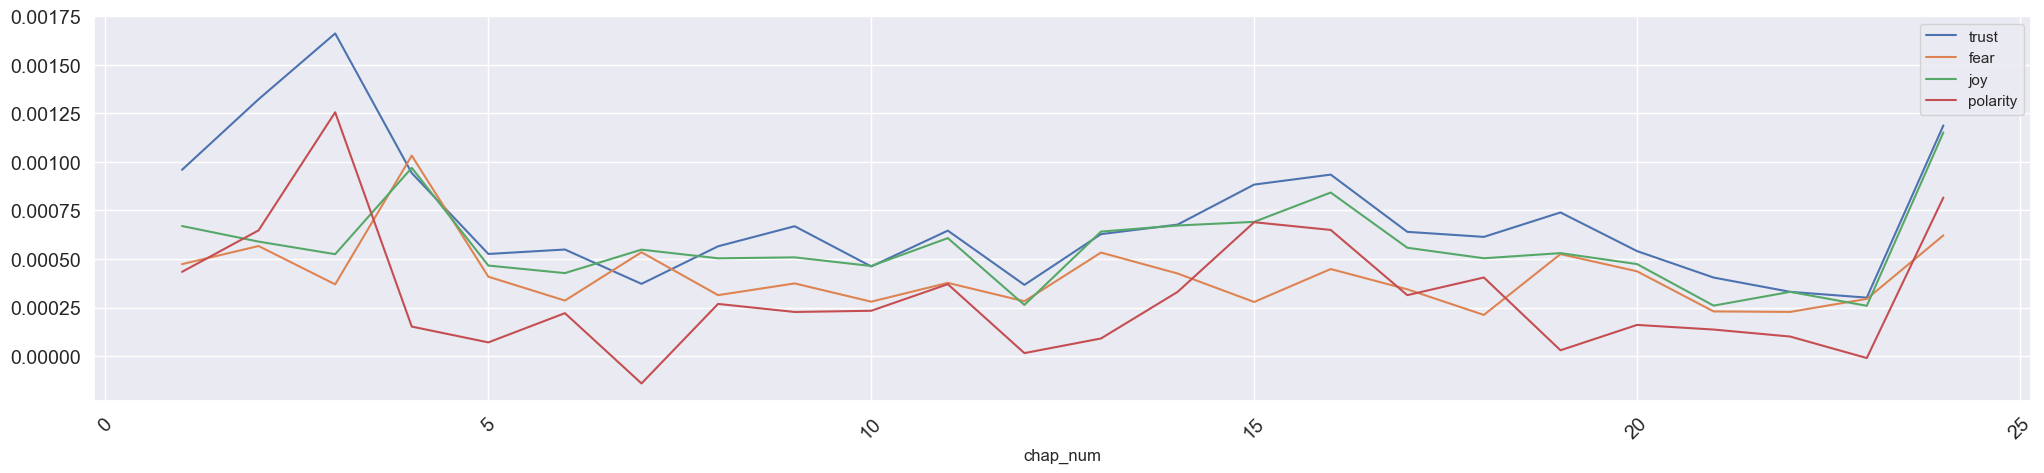

In [36]:
plot_sentiments(PERSUASION_chaps, ['trust','fear','joy','polarity'])

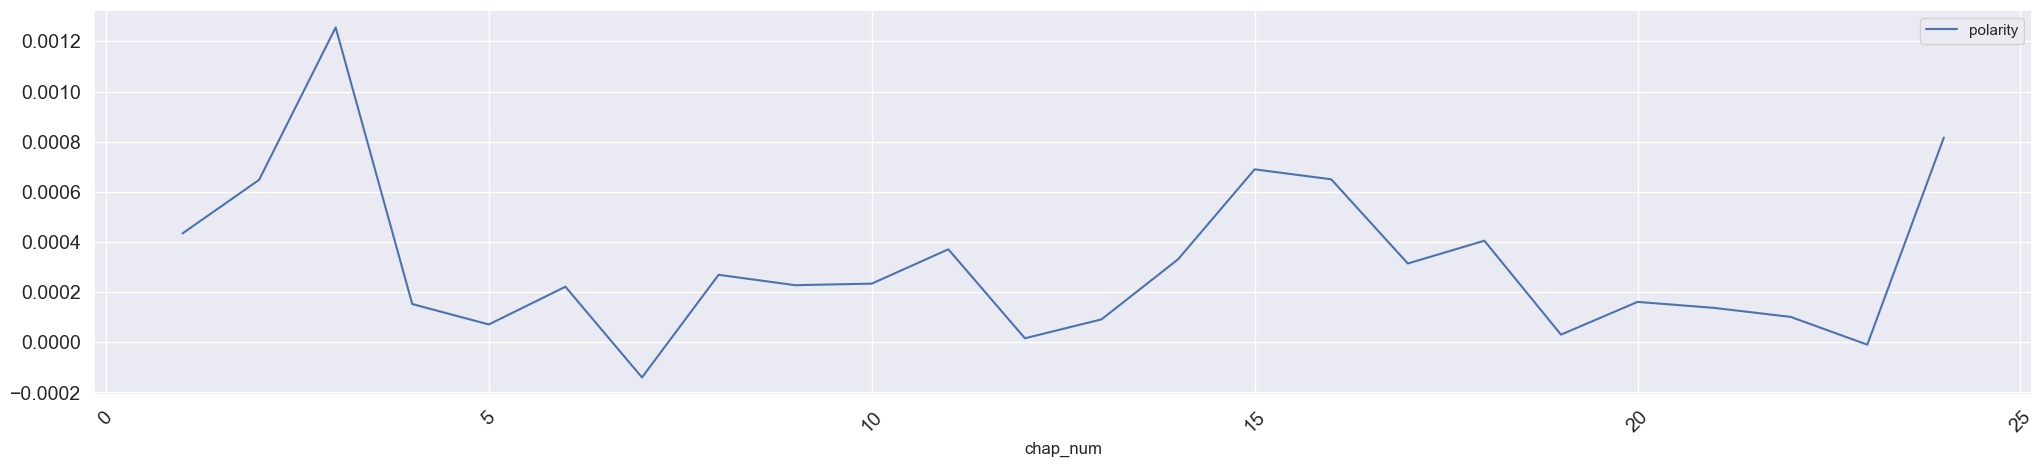

In [37]:
plot_sentiments(PERSUASION_chaps, ['polarity'])

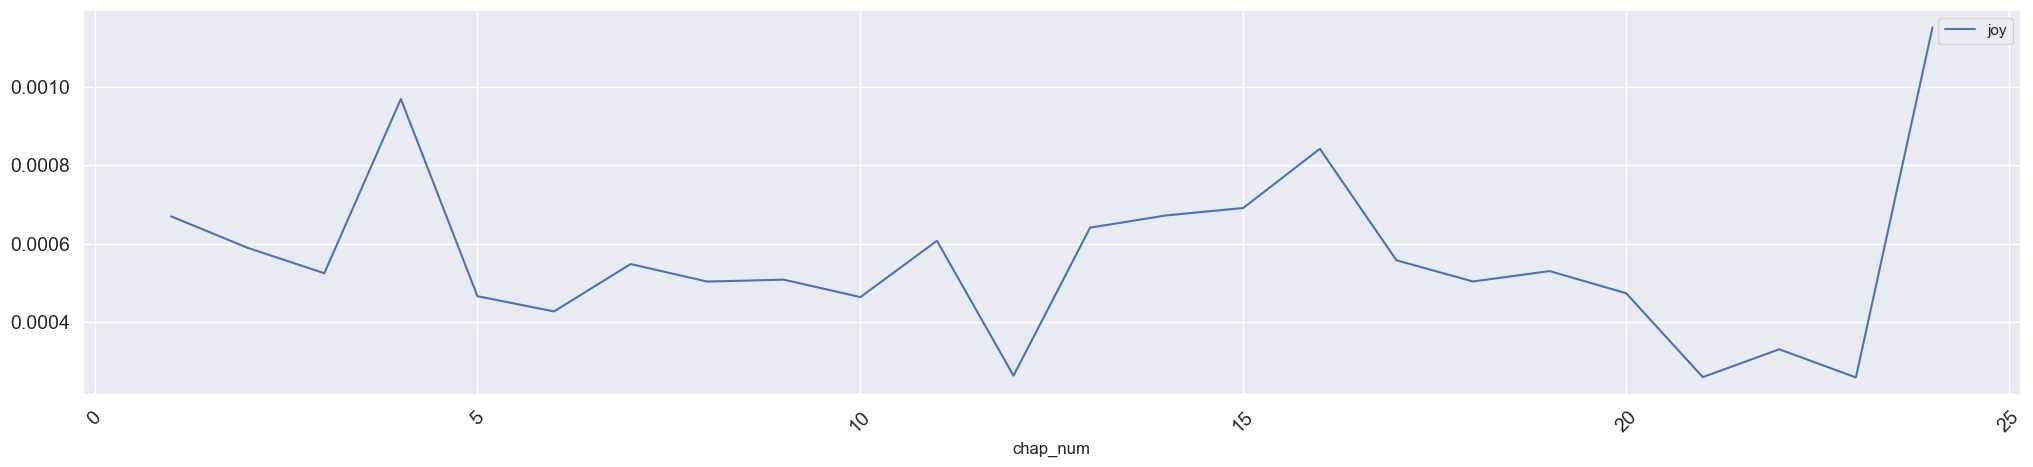

In [38]:
plot_sentiments(PERSUASION_chaps, ['joy'])

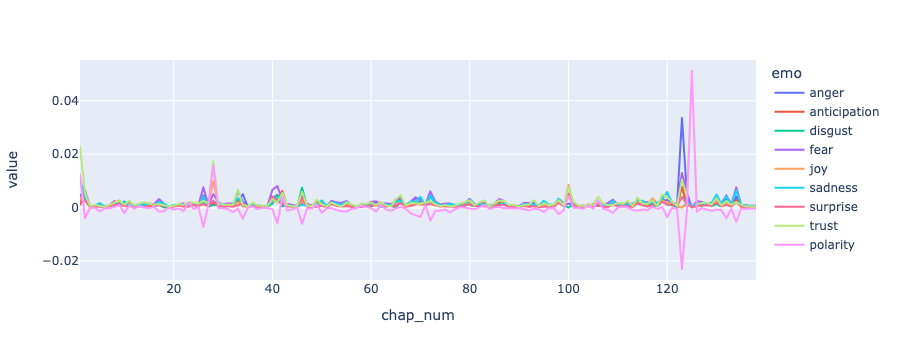

In [39]:
# plot_sentiments(MOBYDICK_chaps, emo_cols)
px.line(MOBYDICK_chaps_thin, x='chap_num', y='value', color='emo')

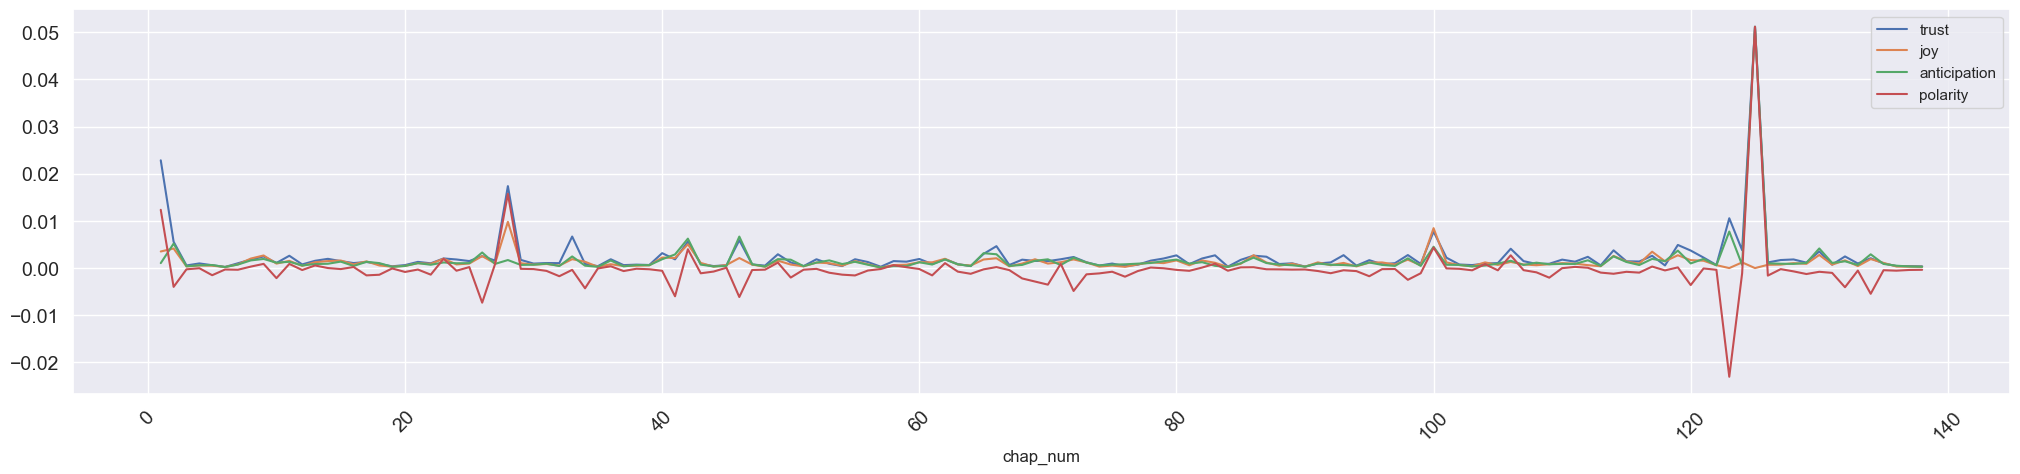

In [40]:
plot_sentiments(MOBYDICK_chaps, ['trust','joy','anticipation','polarity'])

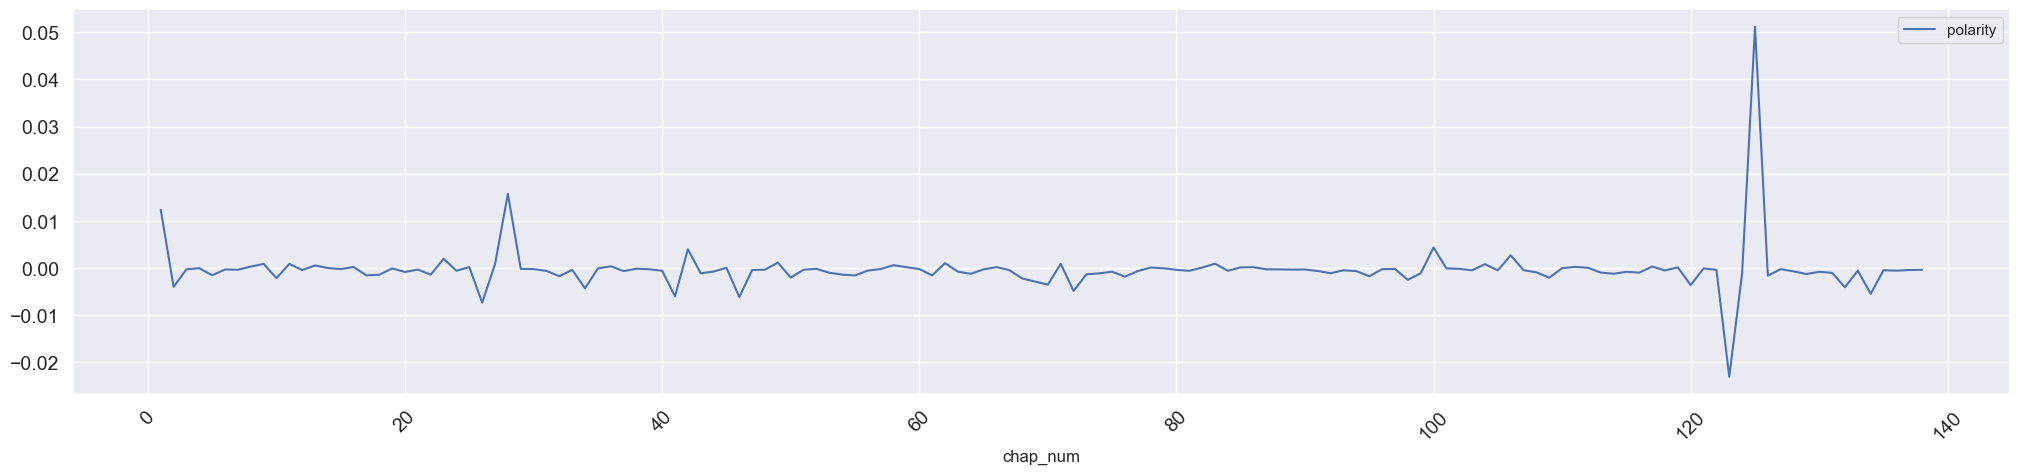

In [41]:
plot_sentiments(MOBYDICK_chaps, ['polarity'])

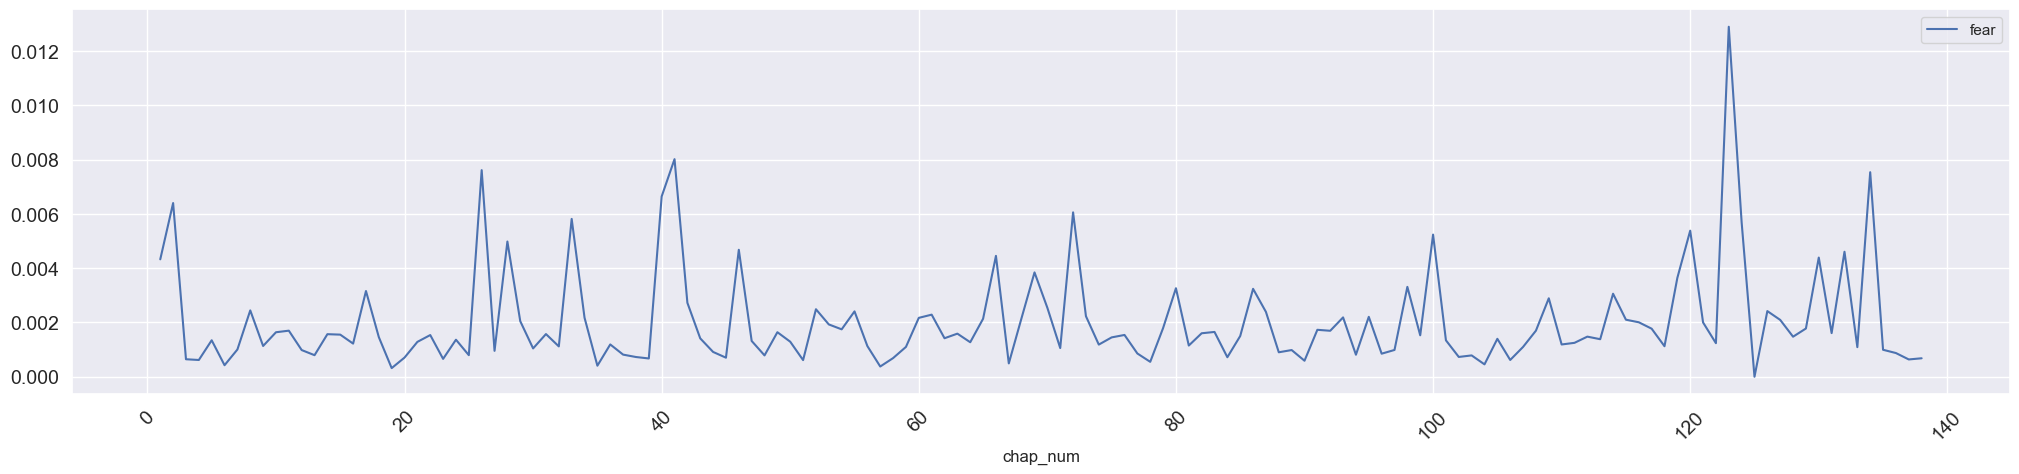

In [42]:
plot_sentiments(MOBYDICK_chaps, ['fear'])

# Cose Read Sentiment in Texts

# Combine VOCAB + SALEX with TOKENS

We need to do this to reconstruct the sentences, which are lost in the BOW representation.

In [43]:
T = TOKENS.join(V, on='term_str').fillna(0)

In [44]:
T.head()

pos_tuple  pos  \
book_id chap_num para_num sent_num token_num                             
105     1        1        0        0               ('Sir', 'NNP')  NNP   
                                   1            ('Walter', 'NNP')  NNP   
                                   2           ('Elliot,', 'NNP')  NNP   
                                   3                 ('of', 'IN')   IN   
                                   4          ('Kellynch', 'NNP')  NNP   

                                             token_str  term_str  term_rank  \
book_id chap_num para_num sent_num token_num                                  
105     1        1        0        0               Sir       sir      135.0   
                                   1            Walter    walter        0.0   
                                   2           Elliot,    elliot        0.0   
                                   3                of        of        0.0   
                                   4          Kellynch  kellynch        0.0   

                                                   n  n_chars         p  \
book_id chap_num para_num sent_num token_num                              
105     1        1        0        0          1798.0      3.0  0.000873   
                                   1             0.0      0.0  0.000000   
                                   2             0.0      0.0  0.000000   
                                   3             0.0      0.0  0.000000   
                                   4             0.0      0.0  0.000000   

                                                      i max_pos  ...  \
book_id chap_num para_num sent_num token_num                     ...   
105     1        1        0        0          10.161306      NN  ...   
                                   1           0.000000       0  ...   
                                   2           0.000000       0  ...   
                                   3           0.000000       0  ...   
                                   4           0.000000       0  ...   

                                              anticipation disgust  fear  joy  \
book_id chap_num para_num sent_num token_num                                    
105     1        1        0        0                   0.0     0.0   0.0  0.0   
                                   1                   0.0     0.0   0.0  0.0   
                                   2                   0.0     0.0   0.0  0.0   
                                   3                   0.0     0.0   0.0  0.0   
                                   4                   0.0     0.0   0.0  0.0   

                                             negative positive  sadness  \
book_id chap_num para_num sent_num token_num                              
105     1        1        0        0              0.0      1.0      0.0   
                                   1              0.0      0.0      0.0   
                                   2              0.0      0.0      0.0   
                                   3              0.0      0.0      0.0   
                                   4              0.0      0.0      0.0   

                                              surprise  trust  polarity  
book_id chap_num para_num sent_num token_num                             
105     1        1        0        0               0.0    1.0       1.0  
                                   1               0.0    0.0       0.0  
                                   2               0.0    0.0       0.0  
                                   3               0.0    0.0       0.0  
                                   4               0.0    0.0       0.0  

[5 rows x 41 columns]

In [45]:
# TOKENSIDX = TOKENS.index
# T = TOKENS.merge(V, on='term_str', how='left')
# T.index = TOKENSIDX
# T = T.fillna(0)

In [46]:
PERSUASION2 = T.loc[persuasion].copy()
MOBYDICK2 = T.loc[mobydick].copy()

In [47]:
emo = 'polarity'

In [48]:
PERSUASION2['html'] = PERSUASION2.apply(lambda x: "<span class='sent{}'>{}</span>".format(int(np.sign(x[emo])), x.term_str), 1)
MOBYDICK2['html'] =  MOBYDICK2.apply(lambda x: "<span class='sent{}'>{}</span>".format(int(np.sign(x[emo])), x.term_str), 1)

In [49]:
PERSUASION2['html'].sample(10)

chap_num  para_num  sent_num  token_num
14        35        1         1               <span class='sent0'>elliot</span>
18        8         1         12               <span class='sent0'>which</span>
23        15        9         7                   <span class='sent0'>it</span>
12        65        1         11                  <span class='sent0'>an</span>
20        41        1         4                   <span class='sent0'>on</span>
23        32        6         9                <span class='sent0'>lives</span>
          60        0         12           <span class='sent1'>qualified</span>
6         1         1         18               <span class='sent0'>could</span>
18        42        0         13                <span class='sent0'>from</span>
23        54        0         18             <span class='sent0'>moments</span>
Name: html, dtype: object

In [50]:
PERSUASION2

pos_tuple   pos  \
chap_num para_num sent_num token_num                                
1        1        0        0                 ('Sir', 'NNP')   NNP   
                           1              ('Walter', 'NNP')   NNP   
                           2             ('Elliot,', 'NNP')   NNP   
                           3                   ('of', 'IN')    IN   
                           4            ('Kellynch', 'NNP')   NNP   
...                                                     ...   ...   
24       12       5        31                ('than', 'IN')    IN   
                           32                  ('in', 'IN')    IN   
                           33               ('its', 'PRP$')  PRP$   
                           34            ('national', 'JJ')    JJ   
                           35         ('importance.', 'NN')    NN   

                                        token_str    term_str  term_rank  \
chap_num para_num sent_num token_num                                       
1        1        0        0                  Sir         sir      135.0   
                           1               Walter      walter        0.0   
                           2              Elliot,      elliot        0.0   
                           3                   of          of        0.0   
                           4             Kellynch    kellynch        0.0   
...                                           ...         ...        ...   
24       12       5        31                than        than        0.0   
                           32                  in          in        0.0   
                           33                 its         its        0.0   
                           34            national    national        0.0   
                           35         importance.  importance     1468.0   

                                           n  n_chars         p          i  \
chap_num para_num sent_num token_num                                         
1        1        0        0          1798.0      3.0  0.000873  10.161306   
                           1             0.0      0.0  0.000000   0.000000   
                           2             0.0      0.0  0.000000   0.000000   
                           3             0.0      0.0  0.000000   0.000000   
                           4             0.0      0.0  0.000000   0.000000   
...                                      ...      ...       ...        ...   
24       12       5        31            0.0      0.0  0.000000   0.000000   
                           32            0.0      0.0  0.000000   0.000000   
                           33            0.0      0.0  0.000000   0.000000   
                           34            0.0      0.0  0.000000   0.000000   
                           35          131.0     10.0  0.000064  13.940060   

                                     max_pos  ...  disgust fear  joy negative  \
chap_num para_num sent_num token_num          ...                               
1        1        0        0              NN  ...      0.0  0.0  0.0      0.0   
                           1               0  ...      0.0  0.0  0.0      0.0   
                           2               0  ...      0.0  0.0  0.0      0.0   
                           3               0  ...      0.0  0.0  0.0      0.0   
                           4               0  ...      0.0  0.0  0.0      0.0   
...                                      ...  ...      ...  ...  ...      ...   
24       12       5        31              0  ...      0.0  0.0  0.0      0.0   
                           32              0  ...      0.0  0.0  0.0      0.0   
                           33              0  ...      0.0  0.0  0.0      0.0   
                           34              0  ...      0.0  0.0  0.0      0.0   
                           35             NN  ...      0.0  0.0  0.0      0.0   

                                     positive sadness  surprise  trust  \
chap_num para_num se

In [51]:
PERSUASION_sents = PERSUASION2.groupby(SENTS[1:])[emo_cols].mean()
MOBYDICK_sents = MOBYDICK2.groupby(SENTS[1:])[emo_cols].mean()

In [52]:
PERSUASION_sents['sent_str'] = PERSUASION2.groupby(SENTS[1:]).term_str.apply(lambda x: x.str.cat(sep=' '))
PERSUASION_sents['html_str'] = PERSUASION2.groupby(SENTS[1:]).html.apply(lambda x: x.str.cat(sep=' '))

In [53]:
MOBYDICK_sents['sent_str'] = MOBYDICK2.groupby(SENTS[1:]).term_str.apply(lambda x: x.str.cat(sep=' '))
MOBYDICK_sents['html_str'] = MOBYDICK2.groupby(SENTS[1:]).html.apply(lambda x: x.str.cat(sep=' '))

In [54]:
def sample_sentences(df):
    rows = []
    for idx in df.sample(10).index:

        valence = round(df.loc[idx, emo], 4)     
        t = 0
        if valence > t: color = '#ccffcc'
        elif valence < t: color = '#ffcccc'
        else: color = '#f2f2f2'
        z=0
        rows.append("""<tr style="background-color:{0};padding:.5rem 1rem;font-size:110%;">
        <td>{1}</td><td>{3}</td><td width="400" style="text-align:left;">{2}</td>
        </tr>""".format(color, valence, df.loc[idx, 'html_str'], idx))

    display(HTML('<style>#sample1 td{font-size:120%;vertical-align:top;} .sent-1{color:red;font-weight:bold;} .sent1{color:green;font-weight:bold;}</style>'))
    display(HTML('<table id="sample1"><tr><th>Sentiment</th><th>ID</th><th width="600">Sentence</th></tr>'+''.join(rows)+'</table>'))

In [55]:
sample_sentences(PERSUASION_sents)

Sentiment,ID,Sentence
0.0976,"(9, 3, 1)",it was unvarying warm admiration everywhere but this intimate footing was not more than established when a certain charles hayter returned among them to be a good deal disturbed by it and to think captain wentworth very much in the way
0.0714,"(9, 18, 1)",either of them would in all probability make him an affectionate good humoured wife
0.0,"(18, 13, 2)",captain benwick and louisa musgrove
0.0556,"(20, 47, 5)",the difference between his present air and what it had been in the octagon room was strikingly great
0.0,"(22, 48, 7)",consider my fathers heir the future representative of the family
0.0,"(6, 15, 4)",how those little fingers of yours fly about
0.0,"(12, 10, 0)",ah
0.0,"(12, 33, 3)",she was safely down and instantly to show her enjoyment ran up the steps to be jumped down again
0.0,"(8, 57, 4)",she is never tired of playing
0.0,"(22, 12, 1)",it was a great object to her to escape all enquiry or eclat but it was her intention to be as decidedly cool to him as might be compatible with their relationship and to retrace as quietly as she could the few steps of unnecessary intimacy she had been gradually led along


In [56]:
sample_sentences(MOBYDICK_sents)

Sentiment,ID,Sentence
0.3333,"(136, 6, 0)",nothing nothing sir
0.1613,"(71, 7, 0)",it does seem to me that herein we see the rare virtue of a strong individual vitality and the rare virtue of thick walls and the rare virtue of interior spaciousness
-0.0256,"(48, 4, 3)",like some poor devils ashore that happen to know an irascible great man they make distant unobtrusive salutations to him in the street lest if they pursued the acquaintance further they might receive a summary thump for their presumption
0.0,"(97, 6, 2)",in thoughts of the visions of the night i saw long rows of angels in paradise each with his hands in a jar of spermaceti
-0.0286,"(114, 2, 1)",and meet it is that over these sea pastures wide rolling watery prairies and potters fields of all four continents the waves should rise and fall and ebb and flow unceasingly for here millions of mixed shades and shadows drowned dreams somnambulisms reveries all that we call lives and souls lie dreaming dreaming still tossing like slumberers in their beds the ever rolling waves but made so by their restlessness
0.0741,"(85, 3, 3)",it was an admirable artistic exploit rarely achieved by the best harpooneers of the present day inasmuch as this leviathan was slain at the very first dart
0.0,"(57, 26, 1)",you must have heard of it
0.0,"(136, 40, 6)",whose is the doubloon now
0.1429,"(84, 46, 4)",but the reason of this is obvious
0.0,"(122, 35, 7)",oh oh


# Try VADER

In [57]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [58]:
PERSUASION_vader_cols = PERSUASION_sents.sent_str.apply(analyser.polarity_scores).apply(lambda x: pd.Series(x))
PERSUASION_vader = pd.concat([PERSUASION_sents, PERSUASION_vader_cols], axis=1)

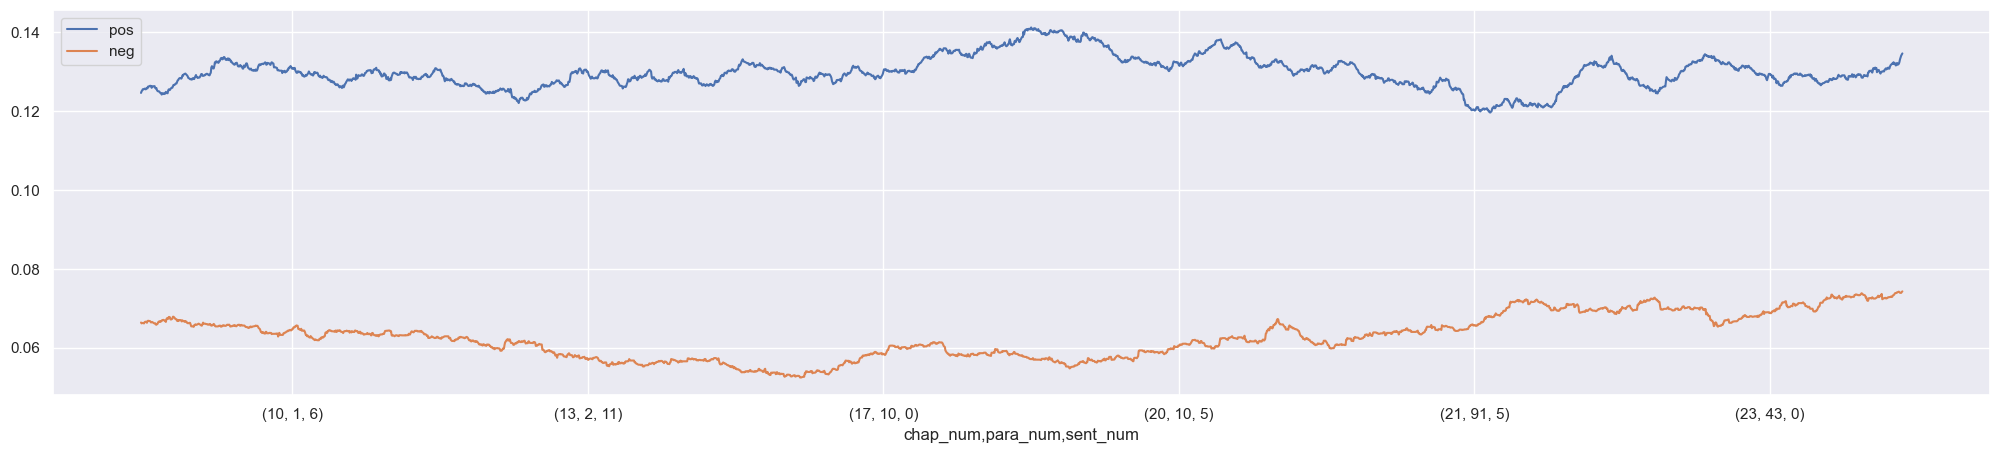

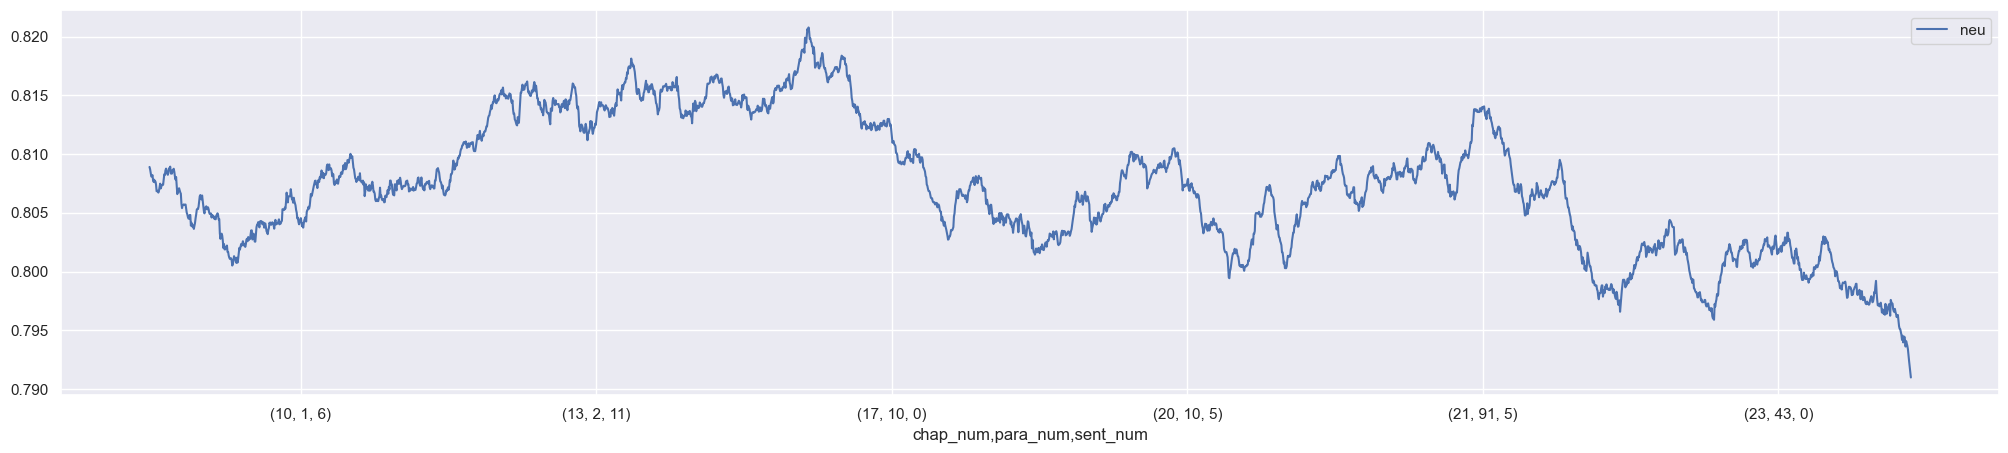

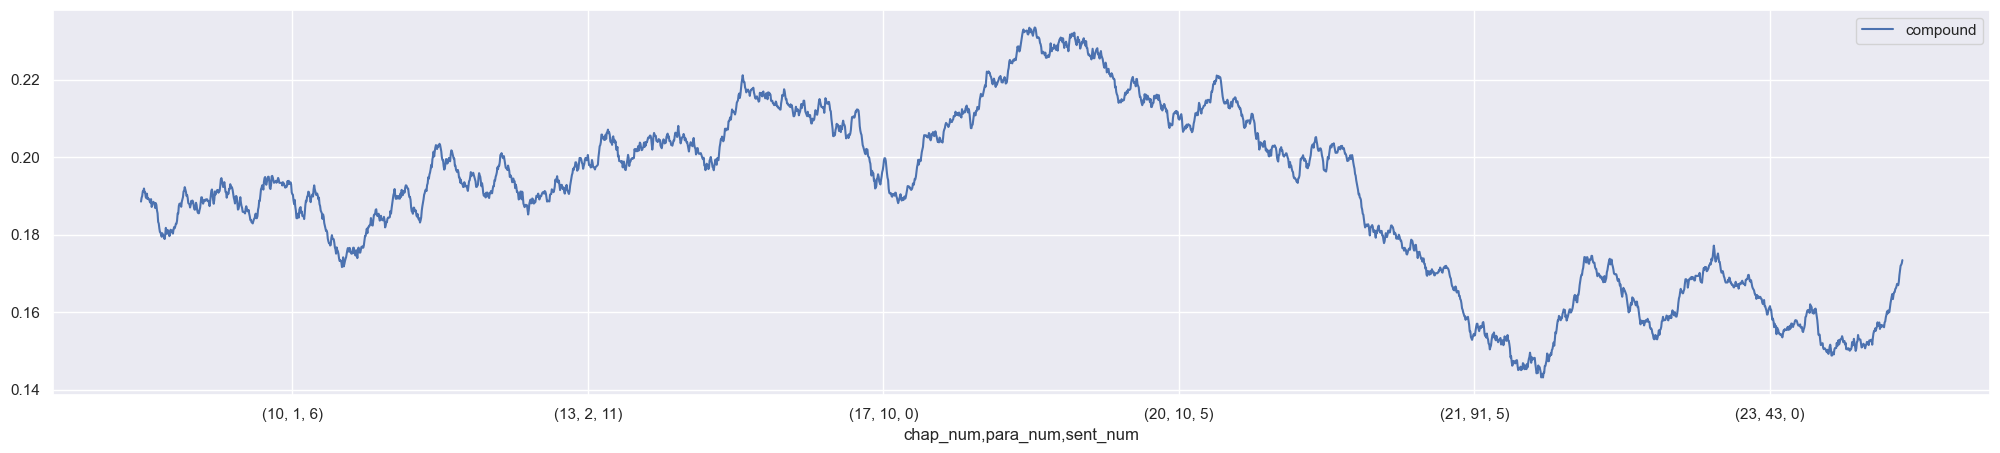

In [59]:
w = int(PERSUASION_vader.shape[0] / 5)
PERSUASION_vader[['pos','neg']].rolling(w).mean().plot(figsize=(25,5));
PERSUASION_vader[['neu']].rolling(w).mean().plot(figsize=(25,5));
PERSUASION_vader[['compound']].rolling(w).mean().plot(figsize=(25,5));

In [60]:
MOBYDICK_vader_cols = MOBYDICK_sents.sent_str.apply(analyser.polarity_scores).apply(lambda x: pd.Series(x))
MOBYDICK_vader = pd.concat([MOBYDICK_sents, MOBYDICK_vader_cols], axis=1)

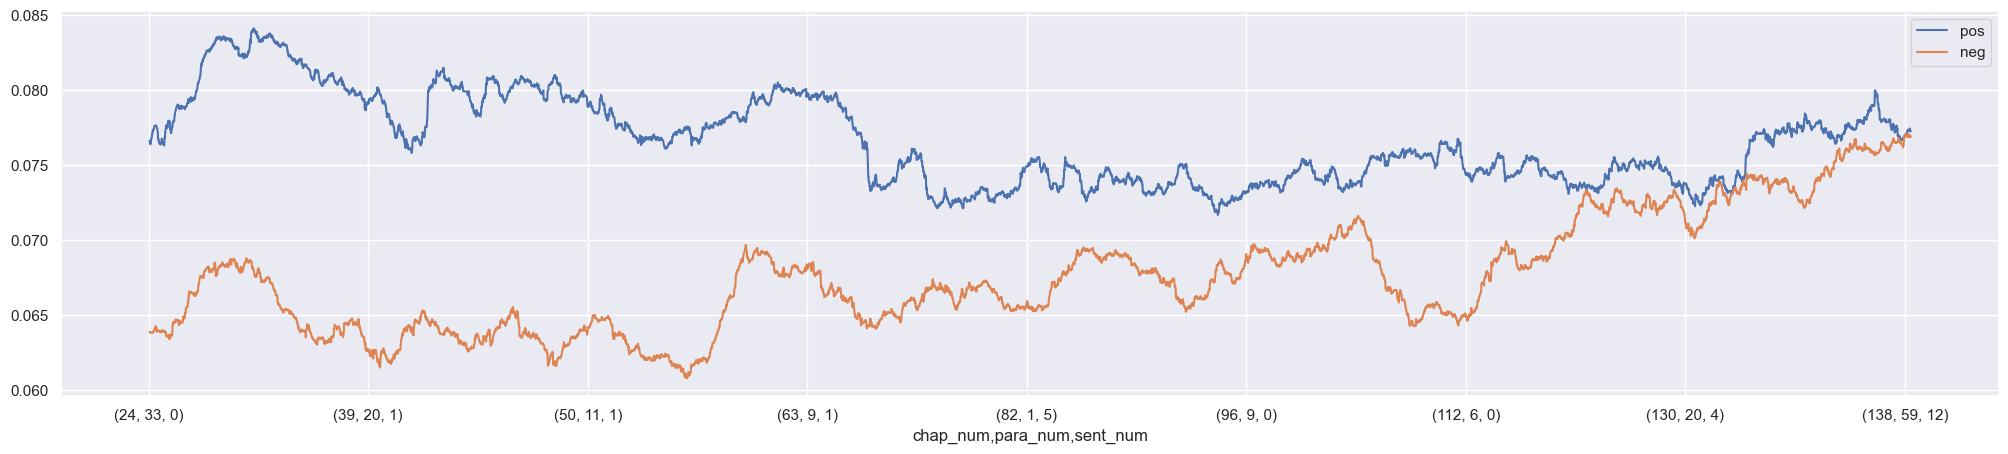

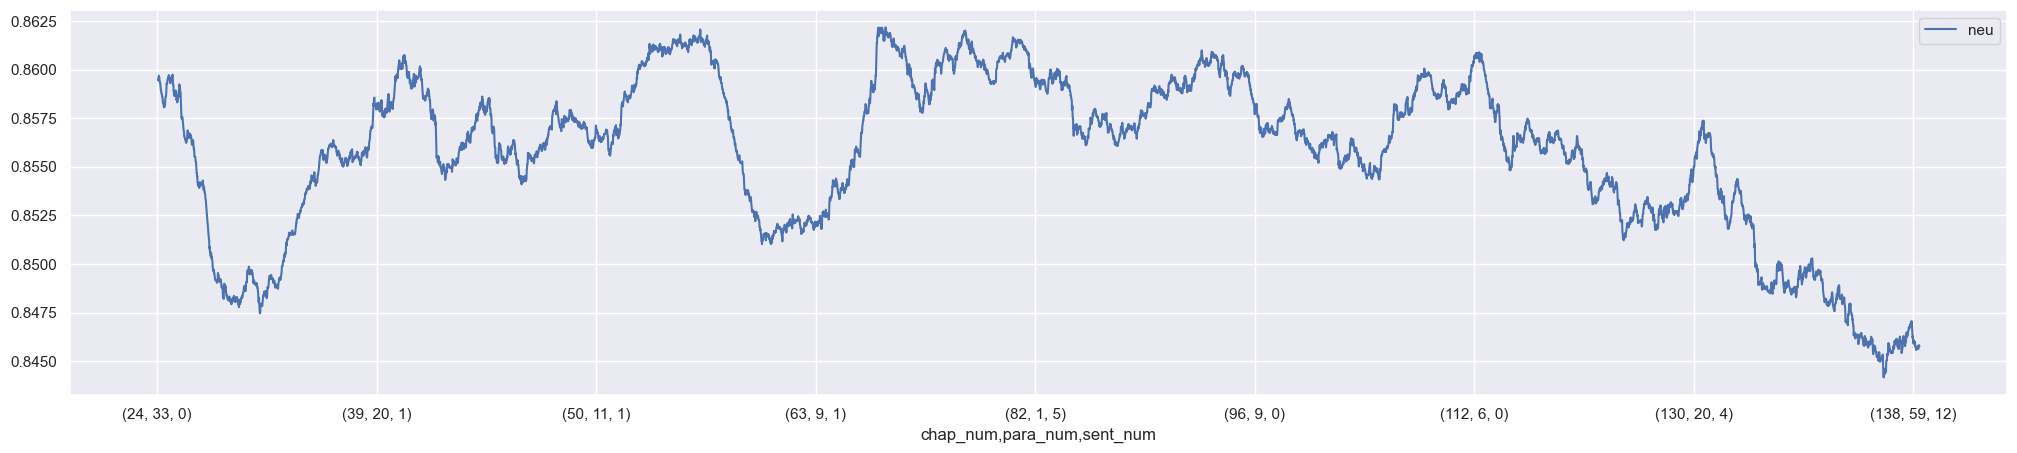

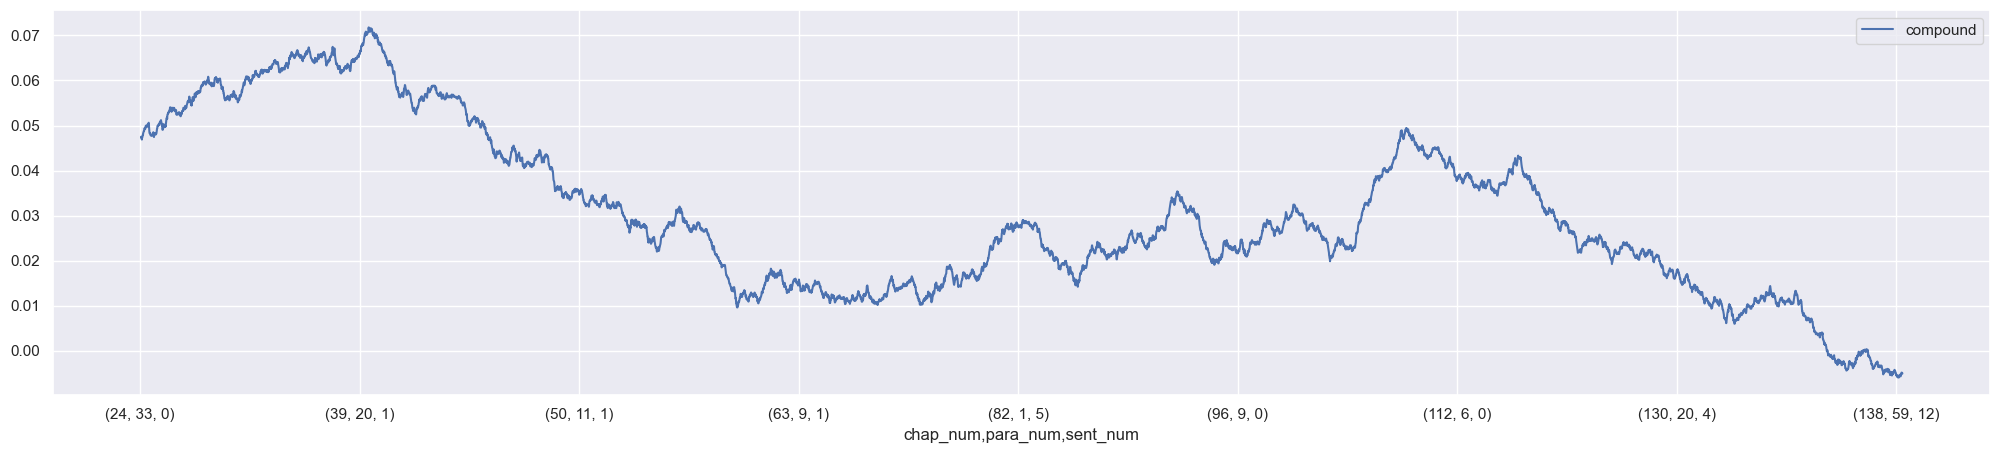

In [61]:
w = int(MOBYDICK_vader.shape[0] / 5)
MOBYDICK_vader[['pos','neg']].rolling(w).mean().plot(figsize=(25,5));
MOBYDICK_vader[['neu']].rolling(w).mean().plot(figsize=(25,5));
MOBYDICK_vader[['compound']].rolling(w).mean().plot(figsize=(25,5));

# Emo Space

In [62]:
import sys; sys.path.append("../lib/")
from hac2 import HAC

In [63]:
EMOX = B[emo_cols].groupby('book_id').mean()\
    .join(LIB.title_short).reset_index(drop=True).set_index('title_short')

In [64]:
EMOX.sort_values('polarity').style.background_gradient(cmap='Spectral', axis=None)

,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,polarity
title_short,,,,,,,,,
MELVILLE 2701: MOBY DICK OR THE WHALE,0.001001,0.000821,0.000680,0.001373,0.000817,0.001057,0.000481,0.001158,-0.000522
MELVILLE 13720: MARDI AND A VOYAGE THITHE,0.001402,0.001376,0.001059,0.002016,0.001369,0.001575,0.000794,0.001633,-0.000484
MELVILLE 15422: ISRAEL POTTER HIS FIFTY Y,0.000738,0.000487,0.000541,0.000949,0.000476,0.000735,0.000276,0.000744,-0.000467
MELVILLE 10712: WHITE JACKET OR THE WORLD,0.001132,0.000760,0.000733,0.001385,0.000714,0.000920,0.000428,0.001276,-0.000420
MELVILLE 13721: MARDI AND A VOYAGE THITHE,0.001290,0.001206,0.001042,0.001630,0.001374,0.001498,0.000783,0.001670,-0.000383
MELVILLE 8118: REDBURN HIS FIRST VOYAGE,0.000797,0.000595,0.000599,0.000830,0.000702,0.000861,0.000370,0.000896,-0.000361
MELVILLE 34970: PIERRE OR THE AMBIGUITIES,0.001045,0.001044,0.000801,0.001296,0.001174,0.001257,0.000632,0.001350,-0.000289
MELVILLE 1900: TYPEE A ROMANCE OF THE SO,0.000341,0.000322,0.000243,0.000466,0.000345,0.000367,0.000191,0.000389,-0.000086
MELVILLE 15859: THE PIAZZA TALES,0.000097,0.000077,0.000074,0.000138,0.000078,0.000125,0.000049,0.000103,-0.000075


<Figure size 640x480 with 0 Axes>

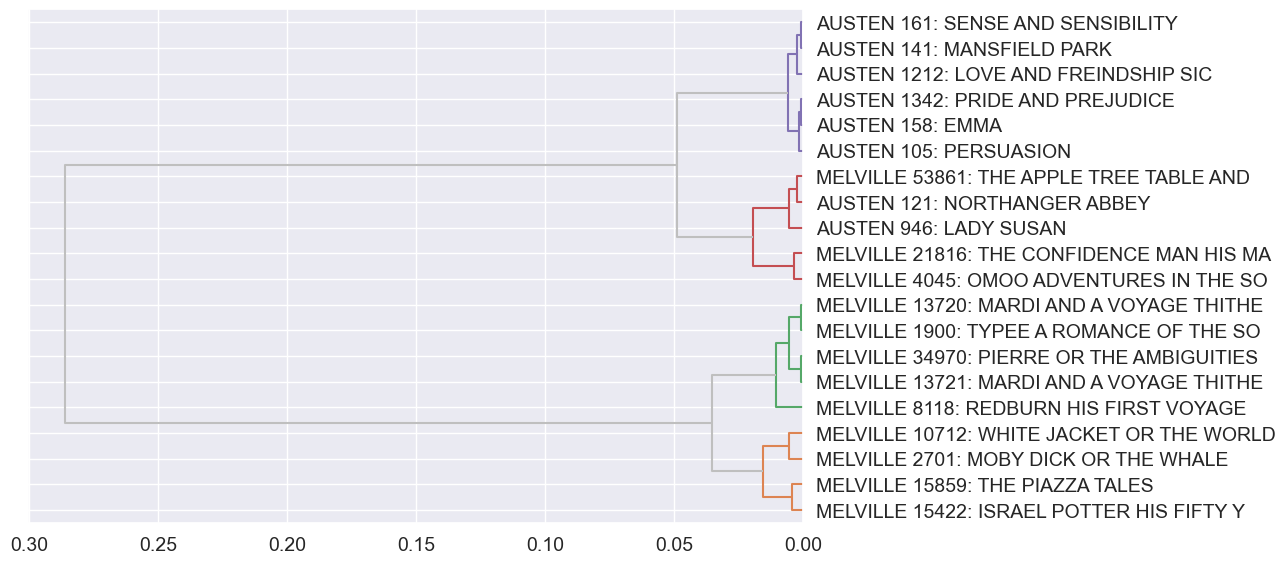

In [68]:
emo_tree = HAC(EMOX)
emo_tree.color_thresh=.03
emo_tree.plot()